In [1]:
from scipy import optimize
import numpy as np
import matplotlib.pyplot as plt

define time series with quadratic curve 

In [2]:
def function_obj(t):
    return t**2 + 20

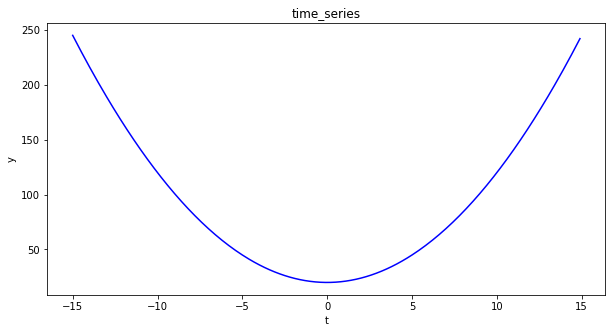

In [3]:
plt.figure(figsize=(10, 5))
t = np.arange(-15, 15, 0.1)
plt.xlabel('t')
plt.ylabel('y')
plt.title('time_series')
plt.plot(t, function_obj(t), 'b-', label='$f(t)=t^2+20$')

In [5]:
def function_lambda(t, t0, t2, beta, mu):
# lambda(t)-mu = beta * (t-t0)(t-t2), t0 and t2 are roots
    return beta*(t-t0)*(t-t2) + mu

In [15]:
def function_mu(t, mu):
    return t*0 + mu # we need to add t*0 to ensure we have values for any given t

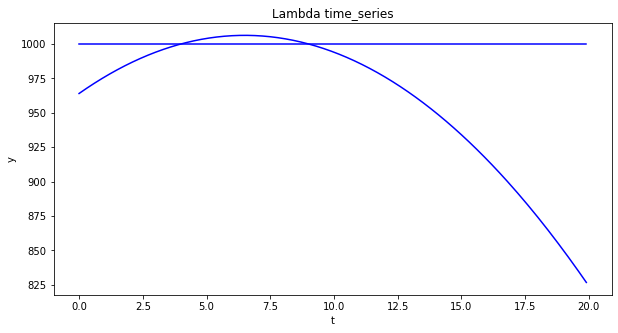

In [16]:
plt.figure(figsize=(10, 5))
t = np.arange(0, 20, 0.1)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Lambda time_series')
t0 = 4
t2 = 9
mu = 1000
beta = -1
plt.plot(t, function_lambda(t, t0,t2, beta,mu), 'b-', label='$beta * (t-t0)(t-t2), t0 and t2 are roots$')
plt.plot(t, function_mu(t, mu), 'b-')

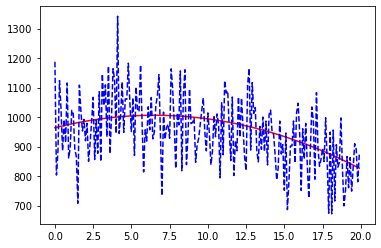

In [18]:
y = function_lambda(t, t0,t2, beta,mu)
y_ = y + 100 * np.random.randn(len(t))
plt.plot(t, y, 'r-', label='$y$')
plt.plot(t, y_, 'b--', label='$y$')
#Para = optimize.leastsq(error, p, args=(x, y_))

How to use leastsq function from scipy.optimize in python to fit both a straight line and a quadratic line to data sets x and y
https://stackoverflow.com/questions/19791581/how-to-use-leastsq-function-from-scipy-optimize-in-python-to-fit-both-a-straight

 linear fit  [ 9.43854354 -6.18989527]


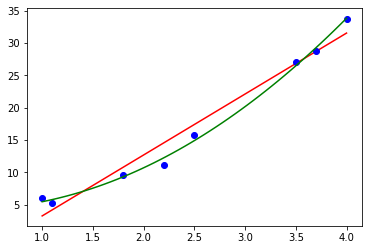

In [23]:
from scipy.optimize import leastsq
import numpy as np
import matplotlib.pyplot as plt


def main():
   # data provided
   x=np.array([1.0,2.5,3.5,4.0,1.1,1.8,2.2,3.7])
   y=np.array([6.008,15.722,27.130,33.772,5.257,9.549,11.098,28.828])
   # here, create lambda functions for Line, Quadratic fit
   # tpl is a tuple that contains the parameters of the fit
   funcLine=lambda tpl,x : tpl[0]*x+tpl[1]
   funcQuad=lambda tpl,x : tpl[0]*x**2+tpl[1]*x+tpl[2]
   # func is going to be a placeholder for funcLine,funcQuad or whatever 
   # function we would like to fit
   func=funcLine
   # ErrorFunc is the diference between the func and the y "experimental" data
   ErrorFunc=lambda tpl,x,y: func(tpl,x)-y
   #tplInitial contains the "first guess" of the parameters 
   tplInitial1=(1.0,2.0)
   # leastsq finds the set of parameters in the tuple tpl that minimizes
   # ErrorFunc=yfit-yExperimental
   tplFinal1,success=leastsq(ErrorFunc,tplInitial1[:],args=(x,y))
   print (" linear fit ",tplFinal1)
   xx1=np.linspace(x.min(),x.max(),50)
   yy1=func(tplFinal1,xx1)
   #------------------------------------------------
   # now the quadratic fit
   #-------------------------------------------------
   func=funcQuad
   tplInitial2=(1.0,2.0,3.0)

   tplFinal2,success=leastsq(ErrorFunc,tplInitial2[:],args=(x,y))
   #print ("quadratic fit",tplFinal2)
   xx2=xx1

   yy2=func(tplFinal2,xx2)
   plt.plot(xx1,yy1,'r-',x,y,'bo',xx2,yy2,'g-')
   plt.show()

if __name__=="__main__":
   main()

 linear fit  [0.97619048 0.10714285]
tplFinal1=
[0.97619048 0.10714285]
tplFinal2=
[0.00595238 0.92261905 0.19642857]


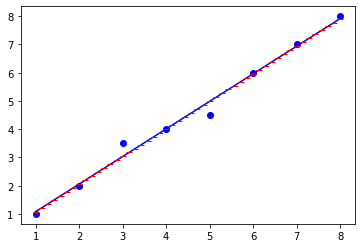

In [9]:
from scipy.optimize import leastsq
import numpy as np
import matplotlib.pyplot as plt

def func_Line(tpl,x):
    return tpl[0]*x+tpl[1]

def Error_Func_line(tpl,x,y):
    return func_Line(tpl,x)-y

def func_Quad(tpl,x):
    return tpl[0]*x**2+tpl[1]*x+tpl[2]

def Error_Func_Quad(tpl,x,y):
    return func_Quad(tpl,x)-y


def regressoin_main():
   # data provided
   x=np.array([1,2,3,4,5,6,7,8])
   y=np.array([1,2,3.5,4,4.5,6,7,8])
   # here, create lambda functions for Line, Quadratic fit
   # tpl is a tuple that contains the parameters of the fit
   # ErrorFunc is the diference between the func and the y "experimental" data
   #tplInitial contains the "first guess" of the parameters 
   tplInitial1=(1.0,2.0)
   # leastsq finds the set of parameters in the tuple tpl that minimizes
   # ErrorFunc=yfit-yExperimental
   plt.plot(x,y,'bo')

   # estimate linear function
   tplFinal1,success=leastsq(Error_Func_line,tplInitial1[:],args=(x,y))
   print (" linear fit ",tplFinal1)
   
   xx1=np.linspace(x.min(),x.max(),50)
   yy1=func_Line(tplFinal1,xx1)
   print("tplFinal1=")
   print(tplFinal1)
   plt.plot(xx1,yy1,'b-')

    # estimate quadratic function
   tplInitial2=(1.0,2.0,3.0)    
   tplFinal2,success=leastsq(Error_Func_Quad,tplInitial2[:],args=(x,y))
   xx2=np.linspace(x.min(),x.max(),50)
   yy2=func_Quad(tplFinal2,xx2)
   plt.plot(xx1,yy1,'r_')
   print("tplFinal2=")
   print(tplFinal2)
   plt.show()

    
regressoin_main()

https://www.cvxpy.org/examples/index.html#basic

In [ ]:
Regression

In [3]:
import cvxpy as cp
import numpy as np

# Generate data.
m = 20
n = 15
np.random.seed(1)
A = np.random.randn(m, n)
b = np.random.randn(m)

# Define and solve the CVXPY problem.
x = cp.Variable(n)
cost = cp.sum_squares(A@x - b)
prob = cp.Problem(cp.Minimize(cost))
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("The optimal x is")
print(x.value)
print("The norm of the residual is ", cp.norm(A@x - b, p=2).value)


The optimal value is 7.005909828287485
The optimal x is
[ 0.17492418 -0.38102551  0.34732251  0.0173098  -0.0845784  -0.08134019
  0.293119    0.27019762  0.17493179 -0.23953449  0.64097935 -0.41633637
  0.12799688  0.1063942  -0.32158411]
The norm of the residual is  2.6468679280023557


 linear program

In [4]:
# Import packages.
import cvxpy as cp
import numpy as np

# Generate a random non-trivial linear program.
m = 15
n = 10
np.random.seed(1)
s0 = np.random.randn(m)
lamb0 = np.maximum(-s0, 0)
s0 = np.maximum(s0, 0)
x0 = np.random.randn(n)
A = np.random.randn(m, n)
b = A@x0 + s0
c = -A.T@lamb0

# Define and solve the CVXPY problem.
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize(c.T@x),
                 [A@x <= b])
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)
print("A dual solution is")
print(prob.constraints[0].dual_value)


The optimal value is -15.220912605552881
A solution x is
[-1.10133381 -0.16360111 -0.89734939  0.03216603  0.6069123  -1.12687348
  1.12967856  0.88176638  0.49075229  0.8984822 ]
A dual solution is
[6.98804778e-10 6.11756416e-01 5.28171747e-01 1.07296862e+00
 3.93759046e-09 2.30153870e+00 4.25704178e-10 7.61206896e-01
 8.36905637e-09 2.49370377e-01 1.30187045e-09 2.06014070e+00
 3.22417207e-01 3.84054343e-01 1.59493732e-09]


https://www.cvxpy.org/examples/derivatives/queuing_design.html

In [1]:
import cvxpy as cp
import numpy as np
import time


mu = cp.Variable(pos=True, shape=(2,), name='mu')
lam = cp.Variable(pos=True, shape=(2,), name='lambda')
ell = cp.Variable(pos=True, shape=(2,), name='ell')

w_max = cp.Parameter(pos=True, shape=(2,), value=np.array([2.5, 3.0]), name='w_max')
d_max = cp.Parameter(pos=True, shape=(2,), value=np.array([2., 2.]), name='d_max')
q_max = cp.Parameter(pos=True, shape=(2,), value=np.array([4., 5.0]), name='q_max')
lam_min = cp.Parameter(pos=True, shape=(2,), value=np.array([0.5, 0.8]), name='lambda_min')
mu_max = cp.Parameter(pos=True, value=3.0, name='mu_max')
gamma = cp.Parameter(pos=True, shape=(2,), value=np.array([1.0, 2.0]), name='gamma')

lq = (ell)**(-2)/cp.one_minus_pos(ell**(-1))
q = lq
w = lq/lam + 1/mu
d = 1/cp.diff_pos(mu, lam)

constraints = [
    w <= w_max,
    d <= d_max,
    q <= q_max,
    lam >= lam_min,
    cp.sum(mu) <= mu_max,
    ell == mu/lam,
]

objective_fn = gamma.T @ ell

problem = cp.Problem(cp.Minimize(objective_fn), constraints)
problem.solve(requires_grad=True, gp=True, eps=1e-14, max_iters=10000, mode='dense')

C:\Users\18016\anaconda3\lib\site-packages\diffcp\cone_program.py:296: UserWarning: Solved/Inaccurate.
  warnings.warn("Solved/Inaccurate.")
C:\Users\18016\anaconda3\lib\site-packages\cvxpy\problems\problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


4.457106782015741

PAQ: 

In [ ]:
import cvxpy as cp
import numpy as np
import time


mu = cp.Variable(pos=True, shape=(2,), name='mu')
lam = cp.Variable(pos=True, shape=(2,), name='lambda')
ell = cp.Variable(pos=True, shape=(2,), name='ell')

w_max = cp.Parameter(pos=True, shape=(2,), value=np.array([2.5, 3.0]), name='w_max')
d_max = cp.Parameter(pos=True, shape=(2,), value=np.array([2., 2.]), name='d_max')
q_max = cp.Parameter(pos=True, shape=(2,), value=np.array([4., 5.0]), name='q_max')
lam_min = cp.Parameter(pos=True, shape=(2,), value=np.array([0.5, 0.8]), name='lambda_min')
mu_max = cp.Parameter(pos=True, value=3.0, name='mu_max')
gamma = cp.Parameter(pos=True, shape=(2,), value=np.array([1.0, 2.0]), name='gamma')

lq = (ell)**(-2)/cp.one_minus_pos(ell**(-1))
q = lq
w = lq/lam + 1/mu
d = 1/cp.diff_pos(mu, lam)

constraints = [
    w <= w_max,
    d <= d_max,
    q <= q_max,
    lam >= lam_min,
    cp.sum(mu) <= mu_max,
    ell == mu/lam,
]

objective_fn = gamma.T @ ell

problem = cp.Problem(cp.Minimize(objective_fn), constraints)
problem.solve(requires_grad=True, gp=True, eps=1e-14, max_iters=10000, mode='dense')

In [ ]:
please install pip install --quiet geopy
Multiple Traveling Salesman Problem
https://colab.research.google.com/github/cvxpy/cvxpy/blob/master/examples/notebooks/WWW/mTSP_en.ipynb

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
from geopy import distance # Library for geographical calculations

################################################
# Original Data
################################################
points = [(-12.059296, -76.975893),
          (-12.079575, -77.009686),
          (-12.087303, -76.996620),
          (-12.084391, -76.975651),
          (-12.063603, -76.960483),
          (-12.056762, -77.014452),
          (-12.011531, -77.002383)]

################################################
# Building distance matrix
################################################
n = len(points)
C = np.zeros((n,n))

for i in range(0, n):
    for j in range(0, len(points)):
        C[i,j] = distance.distance(points[i], points[j]).km

# Showing distance matrix
print('Distance Matrix is:\n')
print(np.round(C,4))

Distance Matrix is:

[[0.     4.3092 3.8329 2.7762 1.7441 4.2076 6.0199]
 [4.3092 0.     1.6596 3.7435 5.6408 2.5764 7.5691]
 [3.8329 1.6596 0.     2.3055 4.7278 3.8966 8.4056]
 [2.7762 3.7435 2.3055 0.     2.8311 5.2142 8.5694]
 [1.7441 5.6408 4.7278 2.8311 0.     5.9246 7.3483]
 [4.2076 2.5764 3.8966 5.2142 5.9246 0.     5.1733]
 [6.0199 7.5691 8.4056 8.5694 7.3483 5.1733 0.    ]]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cvxpy as cp
from geopy import distance # Library for geographical calculations

################################################
# Original Data
################################################
points = [(-12.059296, -76.975893),
          (-12.079575, -77.009686),
          (-12.087303, -76.996620),
          (-12.084391, -76.975651),
          (-12.063603, -76.960483),
          (-12.056762, -77.014452),
          (-12.011531, -77.002383)]

################################################
# Building distance matrix
################################################
n = len(points)
C = np.zeros((n,n))

for i in range(0, n):
    for j in range(0, len(points)):
        C[i,j] = distance.distance(points[i], points[j]).km

# Showing distance matrix
print('Distance Matrix is:\n')
print(np.round(C,4))

In [3]:
################################################
# Solving the integer programming problem
################################################

# Defining variables
X = cp.Variable(C.shape, boolean=True)
u = cp.Variable(n, integer=True)
ones = np.ones((n,1))

# Defining the objective function
objective = cp.Minimize(cp.sum(cp.multiply(C, X)))

# Defining the constraints
constraints = []
constraints += [X @ ones == ones]
constraints += [X.T @ ones == ones]
constraints += [cp.diag(X) == 0]
constraints += [u[1:] >= 2]
constraints += [u[1:] <= n]
constraints += [u[0] == 1]

for i in range(1, n):
    for j in range(1, n):
        if i != j:
            constraints += [ u[i] - u[j] + 1  <= (n - 1) * (1 - X[i, j]) ]

# Solving the problem
prob = cp.Problem(objective, constraints)
prob.solve(verbose=False)

# Transforming the solution to a path
X_sol = np.argwhere(X.value==1)
orden = X_sol[0].tolist()

for i in range(1, n):
    row = orden[-1]
    orden.append(X_sol[row,1])

# Showing the optimal path
print('The path is:\n')
print( ' => '.join(map(str, orden)))

The path is:

0 => 4 => 3 => 2 => 1 => 5 => 6 => 0


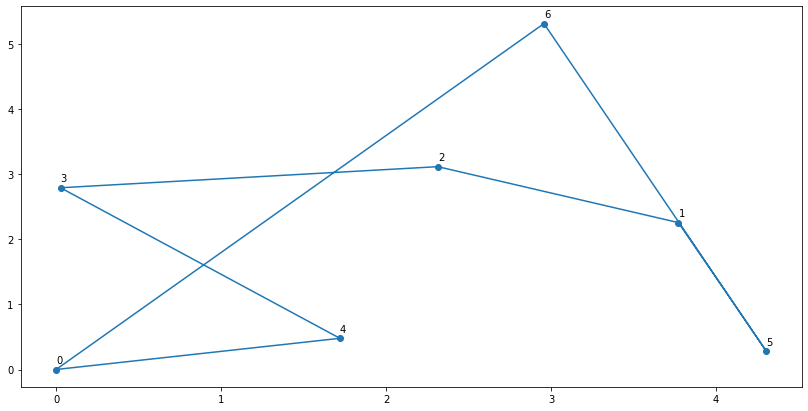

In [4]:
################################################
# Plotting the optimal path
################################################

# Transforming the points to the xy plane approximately
xy_cords = np.zeros((n,2))

for i in range(0, n):
    xy_cords[i,0] = distance.distance((points[0][1],0), (points[i][1],0)).km
    xy_cords[i,1] = distance.distance((0,points[0][0]), (0,points[i][0])).km

# Plotting the points
fig, ax = plt.subplots(figsize=(14,7))

for i in range(n):
    ax.annotate(str(i), xy=(xy_cords[i,0], xy_cords[i,1]+0.1))
    
ax.scatter(xy_cords[:,0],xy_cords[:,1])
ax.plot(xy_cords[orden,0], xy_cords[orden,1])

In [5]:
# Showing the optimal distance
distance = np.sum(np.multiply(C, X.value))
print('The optimal distance is:', np.round(distance,2), 'km')

The optimal distance is: 22.31 km
